### 비지도 학습
- 데이터만 존재하는 경우 학습방법
- 타겟(라벨, 정답)이 없는 데이터
- 분류 기준
    * 유사도(데이터의 거리)
    * 분산(데이터 사이의 분포)
- 평가 기준
    * 유사도와 분산을 기본으로 계산 진행
    * 계산 방법 다양 ==> 평가지표 계수 존재..
- 종류
    * 군집화 ==> 분할, 계층
    * 성분 분석 ==> 주성분 분석
    * 밀도 분류 ==> DBSCAN
- 용도
    * 지도학습의 전처리로 활용
    * 비지도학습으로 분류 후 지도학습으로 최종 평가 기능

### 군집화 => 분할 방식의 K-Means
- k개의 임의의 점을 중심으로 데이터와 거리 측정 후 군집 설정
- 설정된 군집의 평균값의 계산 ==> 중심점 이동 ==> 다시 군집 설정
- 반복해서 진행
- 타원형으로만 군집이 가능함


#### [1] iris 기반 실습

In [3]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
iris_data = load_iris().data
columns = load_iris().feature_names
irisDF = pd.DataFrame(iris_data, columns=columns)
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### [2] 데이터 분류 진행 ==> Kmeans

In [39]:
kModel = KMeans(n_init='auto',max_iter=300, n_clusters=3)

In [40]:
kModel.fit_transform(irisDF)

c:\Users\dddf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[0.19553803, 7.18496963, 5.2240029 ],
       [0.58383642, 7.25923081, 5.19006054],
       [0.58954565, 7.49484323, 5.41709399],
       [0.73881149, 7.31877365, 5.22294435],
       [0.24796852, 7.24779465, 5.28479839],
       [0.94450662, 6.65438227, 4.86915367],
       [0.53169697, 7.39684631, 5.33970692],
       [0.07349138, 7.105422  , 5.1150313 ],
       [1.14156198, 7.56449755, 5.41843592],
       [0.48509568, 7.19364626, 5.13937925],
       [0.67632437, 6.95715825, 5.10297931],
       [0.31030687, 7.09629932, 5.07703082],
       [0.67297949, 7.3666372 , 5.27990507],
       [1.29042203, 8.01827073, 5.85921188],
       [1.41573004, 7.24704509, 5.52473949],
       [1.68324823, 6.93657731, 5.31981294],
       [0.90137779, 7.14223248, 5.32070393],
       [0.18827348, 7.13464702, 5.1773347 ],
       [1.15781333, 6.56364557, 4.83032785],
       [0.50858809, 7.06053095, 5.16397853],
       [0.60439584, 6.66914665, 4.77482774],
       [0.4199303 , 6.99346425, 5.0825294 ],
       [0.

In [19]:
print(kModel.labels_)
print(kModel.inertia_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
78.8556658259773


#### [4] iris 데이터셍의 target이랑 kmeans의 labels 값의 비교

In [43]:
irisDF['target'] = load_iris().target

In [44]:
irisDF['cluster'] = kModel.labels_

In [45]:
irisDF['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [46]:
irisDF['cluster'].value_counts()

2    61
0    50
1    39
Name: cluster, dtype: int64

In [47]:
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transform = pca.fit_transform(iris_data)
irisDF['pca_transform1'] = pca_transform[:,0]
irisDF['pca_transform2'] = pca_transform[:,1]
irisDF.drop(['pca_transform1', 'pca_transform2', 'cluster','target'],axis=1, inplace=True)


### [최적 K 방법1] : inertial 속성값으로 k 판단 => 값이 작을 수록 좋음, k 갯수에 따라 값의 변화가 큰 구간

In [50]:
arr_inertial = []
for n in range(1,11):
    model= KMeans(n_clusters=n, random_state=10,n_init='auto')
    model.fit(irisDF)
    arr_inertial.append(model.inertia_)
    

c:\Users\dddf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dddf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dddf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dddf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

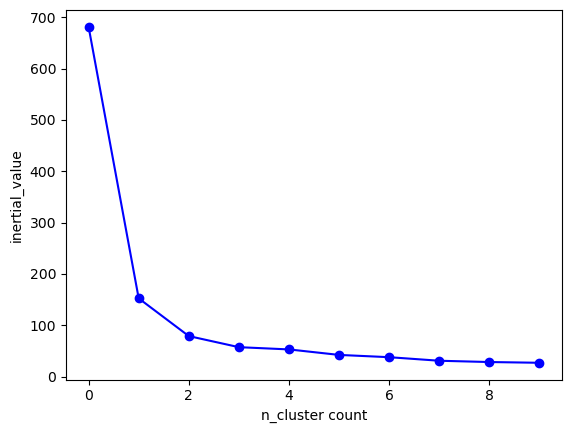

In [59]:
plt.plot(arr_inertial,'bo-')
plt.ylabel('inertial_value')
plt.xlabel('n_cluster count')
plt.show()

### [최적 K 방법2] : Dunn index => 군집간 거리 군집내 거리에 비율로 측정 -> Davies-Bouldin score

In [60]:
from sklearn.metrics import davies_bouldin_score

In [62]:
db_score = []
for n in range(2,11):
    model = KMeans(n_clusters=n, random_state= 10, n_init= 'auto')
    model.fit(irisDF)
    sc = davies_bouldin_score(irisDF, model.labels_)
    db_score.append(sc)


c:\Users\dddf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dddf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dddf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dddf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

Text(0, 0.5, 'davies_bouldin_score')

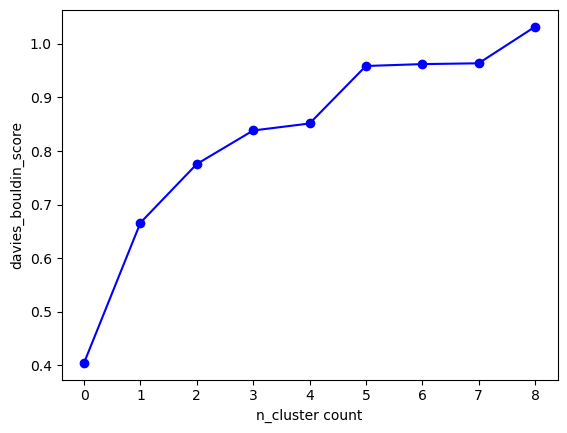

In [64]:
plt.plot(db_score, 'bo-')
plt.xlabel('n_cluster count')
plt.ylabel('davies_bouldin_score')